# Ecommerce

DESCRIPTION

### Problem Statement
<ul>
    <li>Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided.
     <li>The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.
     <li>You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.
</ul>

### Dataset Snapshot

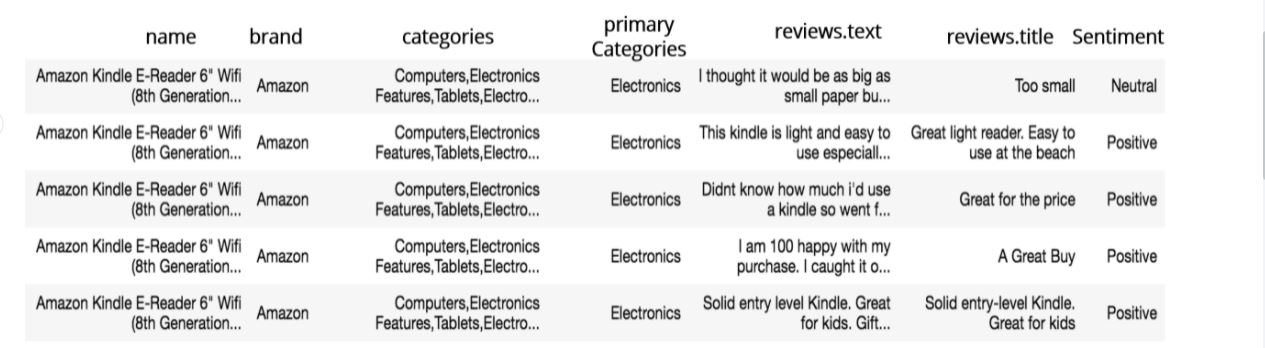

### Project Task: Week 1

#### Class Imbalance Problem:

<ol>
    <li> Perform an EDA on the dataset.
    <ul>
        <li> See what a positive, negative, and neutral review looks like
        <li> Check the class count for each class. It’s a class imbalance problem.
    </ul>
    <li> Convert the reviews in Tf-Idf score.
    <li> Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read train and test files
df_train = pd.read_csv('train_data.csv')
df_train = df_train.rename(columns={'reviews.text':'text'})

df_test = pd.read_csv('test_data.csv')
df_test = df_test.rename(columns={'reviews.text':'text'})

In [3]:
df_train.head()

,name,brand,categories,primaryCategories,reviews.date,text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [4]:
print("Train shape {}, Test shape {}".format(df_train.shape, df_test.shape))

Train shape (4000, 8), Test shape (1000, 7)


In [5]:
#check if there are any duplicate records in train and test; and drop the records if found.
df_train.duplicated().sum(), df_test.duplicated().sum()

(58, 3)

In [6]:
#Remove the duplicate rows
df_train = df_train[df_train.duplicated()==False]
df_train.shape

(3942, 8)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               3942 non-null   object
 1   brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews.date       3942 non-null   object
 5   text               3942 non-null   object
 6   reviews.title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 277.2+ KB


In [8]:
pd.set_option('display.max_colwidth', None)

In [9]:
#Positive Reviews
df_train[df_train.sentiment=='Positive'][['text']].head()

,text
0,"Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money"
1,I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so happy with these purchases and learning so much with Alexa. You can start your daily routine with Alexa and program it to whatever you would like to include news weather music horoscope ALSO you can start your day off with a compliment and I think is very important. Alexa gave me the BEST CHILI RECIPE I MEAN THE BEST it‚Äôs called Chili I. I want my husband to use Alexa to stay organized for business dates and reminders. This is the way to go
3,"very good product. Exactly what I wanted, and a very good price"
4,This is the 3rd one I've purchased. I've bought one for all of my nieces. No other case compares to this one. It has held protected the tablet so many times from them dropping it.
5,This is a great product. Light weight. I wish it has wifi to download from online.


In [10]:
#Neutral Reviews
df_train[df_train.sentiment=='Neutral'][['text']].head()

,text
2,Just an average Alexa option. Does show a few things on screen but still limited.
6,"My 7-year old daughter saved up to by this. Her brother bought the 8GB about a year earlier, so new she needed more space. The OS is a bit clunky, and less intuitive then on higher priced tablets, but tough to beat the price. Speed isn't great for web or certain gaming apps, but fine for books. Parental controls are helpful, but take time to figure out and require more steps than seem necessary to change. Overall, OK first tablet for kids, considering the price. For adults, fine for e-books and VERY basic apps. Otherwise, best to pay up for better quality and OS efficiency."
17,"Not as good as before the old kindle, just seams to work better"
59,There is nothing spectacular about this item but also nothing majorly wrong with it. The biggest flaw is that this is geared to kids and there is no way that I have found searching settings or online to lock the touch screen so that a video keeps playing if the child hits the screen. This means lots of times helping get back into the movie or show rather than just relaxing like an iPad can do with guided access activated.
95,It's unfair for me to rate this product cause I have not even taken it out of the box to set it up.


In [11]:
#Negative Reviews
df_train[df_train.sentiment=='Negative'][['text']].head()

,text
9,"was cheap, can not run chrome stuff, returned to store."
97,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, bathroom, pool, kitchen, other places where I may need hands free, voice activated music and info. My wife bought me the 'newest, hottest' thing. I was skeptical but then thought I would use it to help on a project. Me ""Alexa find videos on f450 drone"" Alexa ""YouTube is not available"". Amazon won't directly sell chrome products, youtube won't play on echo show. Further testing shows the video call is more limited than iPhone or Android apps for video. So the most useful thing now is the same voice functions that my echos and dots perform. Unless I want to make all of my video calls and check the weather from a device I can move no more than 3 feet from an outlet."
104,Too bad Amazon turned this tablet into a big advertising tool. Many apps dont work and the camera is not good.
121,"I bought this Kindle for my 7 year old grand-daughter. I bought a warranty for it. I bought it in August, I have already had to replace it. The charger connection got loose and was not charging. Well, it has happened again. I will need to exchange it again. The problem is that I have to buy the warranty each time. I was going to buy one for her brothers and sister, but I am now rethinking that."
150,"I am reading positive reviews and wish I could say the same. Best Buy is great, so this is not a reflection on them, just our experience with the product. We have had this product for just over one month and I have had to contact Amazon Support, perform factory resets to get content to show up, and the device is poorly designed as the SD card pops out constantly, which messes with DRM, and does you no good if this happens when you are not connected to the Internet to fix it. We are returning, and spending the extra money for an iPad. Will not purchase another kindle device unfortunately just based on this experience. If you just use the device for reading, maybe this is for you, but trying to download information to SD card and actually being able to access it has been beyond frustrating, as well as having to do factory resets so content owned/ already purchased on Amazon would show up on the device in the library."


In [12]:
df_train.sentiment.value_counts()

Positive    3694
Neutral      158
Negative      90
Name: sentiment, dtype: int64

- There are 4000 rows in the train dataset with 8 columns. **sentiment** is the label which is missing in the Test dataframe.
- Train data contains 94% of the Positive records and remaining 6% as Neutral or Negative. This is class Imbalanced problem.

#### Text Pre-processing
We will process the nltk text for below
<ol>
    <li> Lowercasing
    <li> Remove numbers
    <li> Removing Extra Whitespaces
    <li> Tokenization(word)
    <li> Spelling Correction
    <li> Stopwords Removal
    <li> Removing Punctuations
    <li> Lemmatization
</ol>

In [13]:
import re
from nltk import word_tokenize
from spellchecker import SpellChecker
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
#from nltk.stem import PorterStemmer

In [14]:
def process_text(text):
    #convert the passed message to lowercase
    lcase_text =  text.lower()
    
    # remove numbers
    text_nonum = re.sub(r'\d+', '', lcase_text)
    
    #remove the white spaces if any from the converted message
    review_wo_white_spaces = " ".join(text_nonum.split())
    
    #splitting text into tokens
    text_tokens = word_tokenize(review_wo_white_spaces)
    
    #correct the spellings
    spell = SpellChecker()
    correct_word = [spell.correction(word) for word in text_tokens]
    
    #remove stopwords
    wo_stopwords = [word for word in correct_word if word not in stopwords.words('english')]
    
    #remove punctuations
    tokenizer = RegexpTokenizer(r"\w+")
    wo_punctuation = tokenizer.tokenize(' '.join(wo_stopwords))
    
    #Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in wo_punctuation]
    
    #Stemming
    #porter = PorterStemmer()
    #stem = [porter.stem(word) for word in lemm]

    return lemm_text

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [16]:
# bag of words by applying the function and fit the data (text) into it
bag_of_words = CountVectorizer(analyzer=process_text).fit(df_train.text)

In [17]:
len(bag_of_words.vocabulary_)

4095

In [18]:
# apply transform method for the bag of words
text_bagofwords = bag_of_words.transform(df_train.text)

# apply tfidf transformer and fit the bag of words into it (transformed version)
tfidf_transformer = TfidfTransformer().fit(text_bagofwords)

# print shape of the tfidf 
text_tfidf = tfidf_transformer.transform(text_bagofwords)
print(text_tfidf.shape)

(3942, 4095)


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [20]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(text_tfidf, df_train.sentiment)
cv_score = np.mean(cross_val_score(mnb, text_tfidf, df_train.sentiment, cv=5))
print("Average 5-Fold CV Score = {:.4f} ".format(cv_score))

y_predict = mnb.predict(text_tfidf)
print('-'*60)
print(classification_report(df_train.sentiment, y_predict, zero_division=0))

Average 5-Fold CV Score = 0.9371 
------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        90
     Neutral       0.00      0.00      0.00       158
    Positive       0.94      1.00      0.97      3694

    accuracy                           0.94      3942
   macro avg       0.31      0.33      0.32      3942
weighted avg       0.88      0.94      0.91      3942



__Observation :__ Even with the accuracy score of 93%, the model is not identifying records of type Negative and Neutral correctly.

We will test our model with the Negative record at Index 9

In [21]:
df_train.iloc[9,[5,7]]

text         was cheap, can not run chrome stuff, returned to store.
sentiment                                                   Negative
Name: 9, dtype: object

In [22]:
input_data = process_text(df_train.text[9])
bow = bag_of_words.transform(input_data)
mnb.predict(tfidf_transformer.transform(bow)[0])

array(['Positive'], dtype='<U8')

__Observation :__ Model Predicts the record incorrectly as positive.

#### Tackling Class Imbalance Problem:

<ol start="4">
    <li> Oversampling or undersampling can be used to tackle the class imbalance problem.
    <li> In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.
    <li> Use Tree-based classifiers like Random Forest and XGBoost.
</ol>

__Note:__ Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

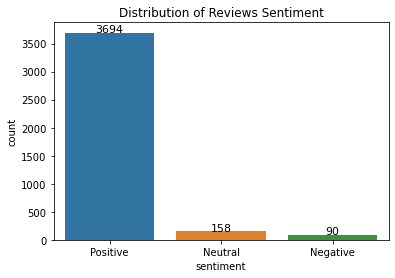

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df_train, x="sentiment")
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+2.5,rect.get_height(), horizontalalignment='center', fontsize = 11)

    
plt.title("Distribution of Reviews Sentiment")
plt.show()

In [24]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = df_train.text.values.reshape(-1,1)
y = df_train.sentiment

print('Original dataset shape {}'.format(Counter(y)))
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({'Positive': 3694, 'Neutral': 158, 'Negative': 90})
Resampled dataset shape Counter({'Positive': 3694, 'Neutral': 3694, 'Negative': 3694})


In [25]:
df_resampled = pd.DataFrame({'text':X_res.reshape(-1), 'sentiment':y_res})

In [26]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11082 entries, 0 to 11081
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       11082 non-null  object
 1   sentiment  11082 non-null  object
dtypes: object(2)
memory usage: 173.3+ KB


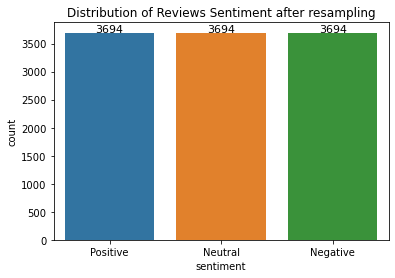

In [27]:
ax = sns.countplot(data=df_resampled, x="sentiment")
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+2.5,rect.get_height(), horizontalalignment='center', fontsize = 11)

    
plt.title("Distribution of Reviews Sentiment after resampling")
plt.show()

In [28]:
df = df_resampled.sample(frac=0.45, random_state=42)
df.shape

(4987, 2)

In [29]:
# Splitting data into training set and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.text, df.sentiment, test_size=0.2, random_state=42)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))

Load 3989 training examples and 998 validation examples. 



In [30]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(" ".join(process_text(d)))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(" ".join(process_text(d)))

Show a cleaned review in the training set : 
 biggest best kindle yet light feather buy one today


In [31]:
def modelEvaluation(y_test, predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nClassification report : \n", classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", confusion_matrix(y_test, predictions))

#### Base MultinomialNB with CountVectorizer

In [32]:
# Fit and transform the training data to a document-term matrix using CountVectorizer
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names_out()))
print("Show some feature names : \n", countVect.get_feature_names_out())

Number of features : 2807 

Show some feature names : 
 ['abc' 'ability' 'able' ... 'äúdual' 'äúshow' 'äúskills']


In [33]:
# Train MultinomialNB classifier
mnb.fit(X_train_countVect, y_train)

# Evaluate the model on validaton set
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(y_test, predictions)


Accuracy on validation set: 0.9329

Classification report : 
               precision    recall  f1-score   support

    Negative       0.96      0.97      0.96       333
     Neutral       0.90      0.93      0.91       305
    Positive       0.94      0.90      0.92       360

    accuracy                           0.93       998
   macro avg       0.93      0.93      0.93       998
weighted avg       0.93      0.93      0.93       998


Confusion Matrix : 
 [[322   8   3]
 [  2 285  18]
 [ 11  25 324]]


__Observation :__ Same model is not giving better f1-score after oversampling the data

#### Base MultinomialNB with TfidfVector

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
# Fitting and transforming the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=2) #minimum document frequency of 2
X_train_tfidf = tfidf.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(tfidf.get_feature_names_out()))
print("Show some feature names : \n", tfidf.get_feature_names_out())

Number of features : 1833 

Show some feature names : 
 ['ability' 'able' 'absolutely' ... 'äôve' 'äù' 'äúskills']


In [36]:
# Train MultinomialNB classifier
mnb.fit(X_train_tfidf, y_train)

# Evaluate the model on validaton set
predictions = mnb.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(y_test, predictions)


Accuracy on validation set: 0.9429

Classification report : 
               precision    recall  f1-score   support

    Negative       0.95      1.00      0.98       333
     Neutral       0.92      0.94      0.93       305
    Positive       0.95      0.89      0.92       360

    accuracy                           0.94       998
   macro avg       0.94      0.94      0.94       998
weighted avg       0.94      0.94      0.94       998


Confusion Matrix : 
 [[333   0   0]
 [  1 287  17]
 [ 15  24 321]]


__Observation :__ Same model is not giving better f1-score after oversampling the data and using tfidf vector

#### RandomForest with tfidf

In [37]:
# Train RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_tfidf, y_train)

# Evaluate the model on validaton set
predictions = rf.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(y_test, predictions)


Accuracy on validation set: 0.9990

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       333
     Neutral       1.00      1.00      1.00       305
    Positive       1.00      1.00      1.00       360

    accuracy                           1.00       998
   macro avg       1.00      1.00      1.00       998
weighted avg       1.00      1.00      1.00       998


Confusion Matrix : 
 [[333   0   0]
 [  0 305   0]
 [  0   1 359]]


#### XGBoost with tfidf

In [38]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train_tfidf, y_train.astype('category').cat.codes)

# Evaluate the model on validaton set
predictions = xgb.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(y_test.astype('category').cat.codes, predictions)

[14:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy on validation set: 0.9780

Classification report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       333
           1       0.95      1.00      0.98       305
           2       1.00      0.94      0.97       360

    accuracy                           0.98       998
   macro avg       0.98      0.98      0.98       998
weighted avg       0.98      0.98      0.98       998


Confusion Matrix : 
 [[333   0   0]
 [  0 305   0]
 [  7  15 338]]


__Observation :__ XGBoost seems to be better model giving better f1_score than MNB model

### Project Task: Week 2

#### Model Selection:

<ol>
    <li> Apply multi-class SVM’s and neural nets.
    <li> Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
    <li> Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.
</ol>

#### Applying LSTM:
<ol start="4">
    <li> Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.
</ol>

__Hint:__ Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

<ol start="5">
    <li> Compare the accuracy of neural nets with traditional ML based algorithms.
    <li> Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral.
</ol>

__Hint:__ Use techniques like Grid Search, Cross-Validation and Random Search

#### Topic Modeling:

<ol start="7">
    <li> Cluster similar reviews.
</ol>

__Note:__ Some reviews may talk about the device as a gift-option. Other reviews may be about product looks and some may highlight about its battery and performance. Try naming the clusters.

#### Multi-class SVM with tfidf

In [39]:
from sklearn import svm

In [40]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
rbf.fit(X_train_tfidf, y_train)

# Evaluate the model on validaton set
predictions = rbf.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(y_test, predictions)


Accuracy on validation set: 0.9108

Classification report : 
               precision    recall  f1-score   support

    Negative       0.97      0.99      0.98       333
     Neutral       0.84      0.91      0.88       305
    Positive       0.91      0.84      0.87       360

    accuracy                           0.91       998
   macro avg       0.91      0.91      0.91       998
weighted avg       0.91      0.91      0.91       998


Confusion Matrix : 
 [[329   0   4]
 [  2 278  25]
 [  7  51 302]]


__Observation :__ SVM with rbf kernel is not predicting better than XGBoost

In [41]:
poly = svm.SVC(kernel='poly', degree=3, C=0.25)
poly.fit(X_train_tfidf, y_train)

# Evaluate the model on validaton set
predictions = poly.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(y_test, predictions)


Accuracy on validation set: 0.9870

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      0.99      0.99       333
     Neutral       1.00      0.97      0.99       305
    Positive       0.97      1.00      0.98       360

    accuracy                           0.99       998
   macro avg       0.99      0.99      0.99       998
weighted avg       0.99      0.99      0.99       998


Confusion Matrix : 
 [[329   0   4]
 [  0 296   9]
 [  0   0 360]]


__Observation :__ SVM with poly kernel is better than SVM rbf kernel

#### Neural Network Model

In [42]:
# Neural nets
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train_tfidf, y_train)

# Evaluate the model on validaton set
predictions = mlp.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(y_test, predictions)


Accuracy on validation set: 0.9830

Classification report : 
               precision    recall  f1-score   support

    Negative       0.99      1.00      0.99       333
     Neutral       0.96      1.00      0.98       305
    Positive       1.00      0.95      0.98       360

    accuracy                           0.98       998
   macro avg       0.98      0.98      0.98       998
weighted avg       0.98      0.98      0.98       998


Confusion Matrix : 
 [[333   0   0]
 [  0 305   0]
 [  5  12 343]]


__Observation :__ MLP Neural network is better than all other models.

#### LSTM Model

In [43]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.core import Dropout, Dense, Activation, SpatialDropout1D
from keras.layers.recurrent import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import np_utils

In [44]:
nb_classes = 3
batch_size = 32
n_epochs = 3
maxlen = 213

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(X_train_cleaned)
X_train = tokenizer.texts_to_sequences(X_train_cleaned)
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)

X_test = tokenizer.texts_to_sequences(X_test_cleaned)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [45]:
model = Sequential()
model.add(Embedding(500, 128, input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 213, 128)          64000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 213, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 113,603
Trainable params: 113,603
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [47]:
model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose = 'auto')

Epoch 1/3
125/125 [==============================] - 54s 381ms/step - loss: 0.7827 - accuracy: 0.6861
Epoch 2/3
125/125 [==============================] - 47s 379ms/step - loss: 0.2733 - accuracy: 0.9025
Epoch 3/3
125/125 [==============================] - 47s 377ms/step - loss: 0.1716 - accuracy: 0.9403


In [48]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 2s 50ms/step - loss: 0.2014 - accuracy: 0.9238


[0.2014112025499344, 0.9238476753234863]

In [49]:
from keras.layers import GRU
from tensorflow.keras.optimizers import SGD

In [50]:
#The GRU architecture
gru = Sequential()
gru.add(GRU(units=128, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
gru.add(Dropout(0.5))
gru.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
gru.add(Dropout(0.5))
gru.add(GRU(units=32, activation='tanh'))
gru.add(Dropout(0.5))
gru.add(Dense(units=nb_classes))

gru.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),
               loss='categorical_crossentropy', metrics=['accuracy'])

# Compiling the GRU
gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 213, 128)          50304     
                                                                 
 dropout (Dropout)           (None, 213, 128)          0         
                                                                 
 gru_1 (GRU)                 (None, 213, 64)           37248     
                                                                 
 dropout_1 (Dropout)         (None, 213, 64)           0         
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                

In [51]:
# Fitting to the training set
gru.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose = 'auto')

Epoch 1/3
125/125 [==============================] - 65s 434ms/step - loss: 1.4215 - accuracy: 0.3359
Epoch 2/3
125/125 [==============================] - 53s 426ms/step - loss: 1.1022 - accuracy: 0.3206
Epoch 3/3
125/125 [==============================] - 54s 428ms/step - loss: 1.1024 - accuracy: 0.3246


In [52]:
gru.evaluate(X_test, y_test)

32/32 [==============================] - 6s 112ms/step - loss: 1.0933 - accuracy: 0.3357


[1.0933406352996826, 0.3356713354587555]

__Observation :__ LSTM seems to be predicting better than GRU

Topic Modelling

In [53]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [54]:
import nltk
nltk.download('wordnet')

import gensim
from gensim import corpora

doc_complete = df_train["text"].tolist()
doc_clean = [process_text(doc) for doc in doc_complete]

dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nbhup\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dictionary(4095 unique tokens: ['able', 'access', 'accomplish', 'ad', 'add']...)


In [55]:
from gensim.models import LdaModel
num_topics = 9
ldamodel = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=30)

In [56]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.025*"speaker" + 0.025*"sound" + 0.025*"like" + 0.022*"echo" + 0.015*"work" + 0.011*"tap" + 0.011*"quality" + 0.010*"great" + 0.010*"alexa" + 0.010*"music"')

(1, '0.058*"kindle" + 0.027*"book" + 0.018*"read" + 0.016*"fire" + 0.015*"reading" + 0.014*"battery" + 0.011*"reader" + 0.010*"love" + 0.010*"light" + 0.010*"go"')

(2, '0.039*"love" + 0.035*"game" + 0.027*"tablet" + 0.025*"great" + 0.024*"kid" + 0.018*"play" + 0.017*"use" + 0.017*"gift" + 0.017*"bought" + 0.015*"book"')

(3, '0.047*"love" + 0.040*"echo" + 0.030*"alexa" + 0.021*"music" + 0.018*"show" + 0.017*"great" + 0.015*"light" + 0.014*"home" + 0.012*"bought" + 0.011*"use"')

(4, '0.050*"one" + 0.023*"great" + 0.023*"bought" + 0.017*"device" + 0.016*"buy" + 0.014*"amazon" + 0.013*"purchase" + 0.012*"best" + 0.011*"get" + 0.010*"product"')

(5, '0.015*"well" + 0.014*"show" + 0.014*"would" + 0.013*"amazon" + 0.013*"work" + 0.012*"store" + 0.011*"enjoyed" + 0.010*"google" + 0.010*"apps" + 0.009*"good"')

(6, '0.075*"tablet

In [57]:
word_dict = {}
for i in range(num_topics):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [58]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,speaker,kindle,love,love,one,well,tablet,screen,easy
1,sound,book,game,echo,great,show,great,amazon,use
2,like,read,tablet,alexa,bought,would,love,good,great
3,echo,fire,great,music,device,amazon,kid,great,set
4,work,reading,kid,show,buy,work,year,video,work
5,tap,battery,play,great,amazon,store,old,nice,product
6,quality,reader,use,light,purchase,enjoyed,price,tablet,fun
7,great,love,gift,home,best,google,apps,picture,äôs
8,alexa,light,bought,bought,get,apps,use,device,love
9,music,go,book,use,product,good,bought,price,setup


In [59]:
#import pyLDAvis.gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [60]:
#Lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False)
Lda_display = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(Lda_display)

C:\Users\nbhup\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
